In [11]:
import os
import sys
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dotenv import load_dotenv
from pathlib import Path

# Load environment variables
load_dotenv()

# Set up logging
import logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
import seaborn as sns
# Jupyter specific settings
%matplotlib inline
# 'seaborn' is not a valid style. Use a built-in style or a custom style sheet.
# You can list available styles with plt.style.available
# For now, let's use a default style that's similar to seaborn
plt.style.use('default')

from rich import print as rprint
from pprint import pprint


# ai
import marvin
import marvin.audio

from entries import *
from entries import CallEntry, CallLog
from util_json import read_logs ,append_to_json_file


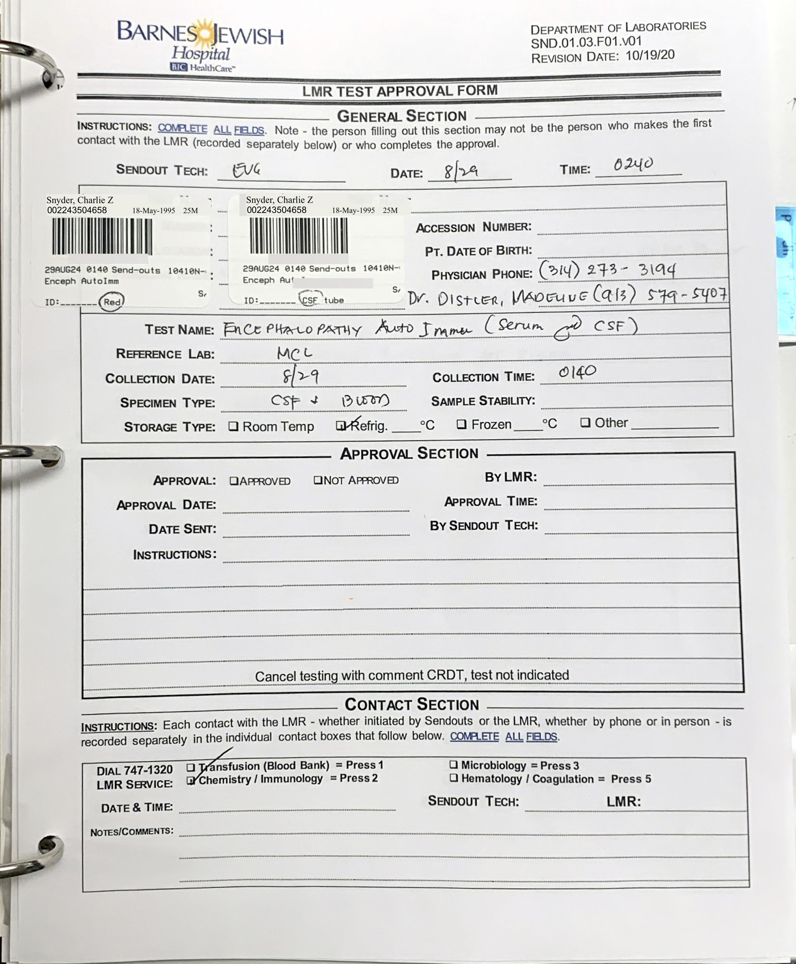

In [18]:
sendout_path = "approval-form.png"
sendout_image = marvin.Image.from_path(sendout_path)
%matplotlib inline
from PIL import Image
image = Image.open("approval-form.png")
image.resize((int(796), int(964)))

In [16]:
sendout_data = marvin.cast(
    sendout_image,
    target=CallEntry,
    instructions="""\
    You are an expert in image processing and analysis. 
    You are given an image of a form that needs to be approved. 
    Your task is to analyze the image and provide a detailed report on the form's content 
    """,
)
rprint(sendout_data)

2024-10-01 01:26:32,970 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


CallEntry(
    service='Chemistry',
    patient=Patient(
        last_name='snyder',
        first_name='charlie',
        dob=datetime.datetime(1995, 5, 18, 0, 0),
        mrn=2904624,
        sex='M',
        age=25
    ),
    caller=Caller(
        last_name='distler',
        first_name='unknown',
        callback_number='(314) 273-3194',
        clinical_service='Neurology',
        attending_doctor=None,
        caller_details=None
    ),
    laboratory_test='Encephalopathy Auto Immune (Serum and CSF)',
    call_category='Test Approval',
    call_details='Test approval for Encephalopathy Auto Immune (Serum and CSF). Collection date: 8/29, Collection 
time: 0140. Sample stability: Room Temp, Refrigerated.',
    specimen_type='CSF and blood',
    resolution='New'
)

### phi carefully redacted
![d](../src/ai_logger/ss-photoshop-phi.png)

In [22]:
## add 1 more to log
append_to_json_file(entry=sendout_data)

#### Made 50 more of these with ai:

In [27]:
# Create additional mock call data
additional_call = CallEntry(
    service="Microbiology",
    patient=Patient(
        last_name="johnson",
        first_name="emily",
        dob=datetime(1988, 7, 15),
        mrn=3456789,
        sex="F",
        age=35,
    ),
    caller=Caller(
        last_name="smith",
        first_name="robert",
        callback_number="(555) 123-4567",
        clinical_service="Internal Med",
        attending_doctor=None,
        caller_details="resident on night shift",
    ),
    laboratory_test="blood culture",
    call_category="Alert",
    call_details="Positive blood culture for gram-negative rods. Patient has fever and elevated WBC count. Requesting urgent identification and susceptibility testing.",
    specimen_type="blood",
    resolution="Pending",
)

In [12]:
read_logs()

[{'service': 'Chemistry',
  'patient': {'last_name': 'marshall',
   'first_name': 'frank george',
   'dob': '1977-03-01T00:00:00Z',
   'mrn': 242317722,
   'sex': None,
   'age': None},
  'caller': {'last_name': 'halsey',
   'first_name': 'bill',
   'callback_number': '',
   'clinical_service': 'Neurology',
   'attending_doctor': None,
   'caller_details': 'medical student on the general neuroservice'},
  'laboratory_test': 'FGQ1B antibody',
  'call_category': 'Lab Problem',
  'call_details': "This patient had a serum sample sent to Mayo three days ago and since then has had plasmapheresis and we'd like to test the FGQ1B antibody on serum. We're having trouble because we did plasmapheresis and now we can't detect the antibody so we're looking for an old sample. We're wondering if either we in the lab at BGH have a sample or at Mayo they have a sample we could add on or send to Mayo to get the FGQ1B antibody.",
  'specimen_type': 'serum',
  'resolution': 'New'},
 {'service': 'Chemistry'

In [37]:
# Append the additional call data to the JSON file
append_to_json_file(call_entry=additional_call)

# Print the newly added call for verification
print("New call added:")
rprint(additional_call)

New call added:


CallEntry(
    service='Microbiology',
    patient=Patient(
        last_name='johnson',
        first_name='emily',
        dob=datetime.datetime(1988, 7, 15, 0, 0),
        mrn=3456789,
        sex='F',
        age=35
    ),
    caller=Caller(
        last_name='smith',
        first_name='robert',
        callback_number='(555) 123-4567',
        clinical_service='Internal Med',
        attending_doctor=None,
        caller_details='resident on night shift'
    ),
    laboratory_test='blood culture',
    call_category='Alert',
    call_details='Positive blood culture for gram-negative rods. Patient has fever and elevated WBC count. 
Requesting urgent identification and susceptibility testing.',
    specimen_type='blood',
    resolution='Pending'
)

## So far--one call at a time. What would analyzing many calls at once look like?
###  create dataset -- Process at Scale

In [28]:
# Map ai interpretation to each call raw-text record
load_dotenv()
import marvin

# simulated_calls_dir = Path("simulated-calls")
# call_raw_list: list[str] = [c.read_text() for c in simulated_calls_dir.iterdir() if c.is_file()]
# call_entry_list: list[CallEntry] = []
for ix, call in enumerate(call_raw_list[37:]):
    print(f"ix: {ix}")  # in case "too many requests"
    call_entry: CallEntry = marvin.cast(call, target=CallEntry)
    call_entry_list.append(call_entry)

ix: 0


2024-10-01 03:21:10,035 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


ix: 1


2024-10-01 03:21:12,579 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


ix: 2


2024-10-01 03:21:14,882 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


ix: 3


2024-10-01 03:21:18,574 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


ix: 4


2024-10-01 03:21:21,094 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


ValidationError: 1 validation error for FormatResponse
value.caller.clinical_service
  Input should be 'Allergy', 'BMT', 'Cardio Thoracic', 'ED', 'Endocrine', 'GI', 'GU', 'Hematology', 'Internal Med', 'Neurology', 'OB-GYN', 'Orthopedics', 'Pulmonary', 'Renal', 'Rheumatology', 'SLCH', 'Surgery', 'Podiatry', 'Psychiatry' or 'Other' [type=literal_error, input_value='Pediatrics', input_type=str]
    For further information visit https://errors.pydantic.dev/2.9/v/literal_error

In [29]:
call_entry_list

[CallEntry(service='Chemistry', patient=Patient(last_name='blue', first_name='robert', dob=datetime.datetime(1978, 8, 8, 0, 0), mrn=778800112, sex=None, age=None), caller=Caller(last_name='yellow', first_name='dr.', callback_number='', clinical_service='Rheumatology', attending_doctor=None, caller_details=None), laboratory_test='ANA', call_category='Consult', call_details="The results are showing borderline levels. The patient has symptoms of lupus, and we need to confirm the diagnosis to start the treatment. Can you verify the results and let us know if we need to collect a new sample? The patient's symptoms are worsening, and we need accurate results to proceed with the treatment.", specimen_type='blood', resolution='New'),
 CallEntry(service='Microbiology', patient=Patient(last_name='yellow', first_name='emily', dob=datetime.datetime(1990, 2, 2, 0, 0), mrn=889911223, sex=None, age=None), caller=Caller(last_name='purple', first_name='dr.', callback_number='', clinical_service='GI', a

In [30]:
## Save to json, works
call_log = CallLog(
    call_records=call_entry_list
)  # * simple data manipulation + validation
Path("call_log50.json").write_text(call_log.model_dump_json())

34798

In [34]:
# | output: rich
rprint(call_log)  # * Neat

CallLog(
    call_records=[
        CallEntry(
            service='Chemistry',
            patient=Patient(
                last_name='blue',
                first_name='robert',
                dob=datetime.datetime(1978, 8, 8, 0, 0),
                mrn=778800112,
                sex=None,
                age=None
            ),
            caller=Caller(
                last_name='yellow',
                first_name='dr.',
                callback_number='',
                clinical_service='Rheumatology',
                attending_doctor=None,
                caller_details=None
            ),
            laboratory_test='ANA',
            call_category='Consult',
            call_details="The results are showing borderline levels. The patient has symptoms of lupus, and we need
to confirm the diagnosis to start the treatment. Can you verify the results and let us know if we need to collect a
new sample? The patient's symptoms are worsening, and we need accurate results to proceed with the treatment.",
            specimen_type='blood',
            resolution='New'
        ),
        CallEntry(
            service='Microbiology',
            patient=Patient(
                last_name='yellow',
                first_name='emily',
                dob=datetime.datetime(1990, 2, 2, 0, 0),
                mrn=889911223,
                sex=None,
                age=None
            ),
            caller=Caller(
                last_name='purple',
                first_name='dr.',
                callback_number='',
                clinical_service='GI',
                attending_doctor=None,
                caller_details=None
            ),
            laboratory_test='H. pylori',
            call_category='Lab Problem',
            call_details="The results of the H. pylori test on the stool sample are inconclusive. The patient has 
symptoms of peptic ulcer disease, and confirmation is needed to start treatment. The patient's condition is 
critical, and accurate results are needed urgently.",
            specimen_type='stool',
            resolution='New'
        ),
        CallEntry(
            service='Microbiology',
            patient=Patient(
                last_name='green',
                first_name='david',
                dob=datetime.datetime(1970, 12, 25, 0, 0),
                mrn=778899001,
                sex=None,
                age=None
            ),
            caller=Caller(
                last_name='martinez',
                first_name='unknown',
                callback_number='unknown',
                clinical_service='Pulmonary',
                attending_doctor=None,
                caller_details=None
            ),
            laboratory_test='Tuberculosis testing',
            call_category='Lab Problem',
            call_details="The patient has a persistent cough and weight loss, and we need to confirm the diagnosis 
to start the treatment. Can you check the status of the sample and expedite the testing process? The patient's 
condition is not improving, and we need the results urgently.",
            specimen_type='sputum',
            resolution='New'
        ),
        CallEntry(
            service='Chemistry',
            patient=Patient(
                last_name='doe',
                first_name='john',
                dob=datetime.datetime(1980, 1, 1, 0, 0),
                mrn=123456789,
                sex=None,
                age=None
            ),
            caller=Caller(
                last_name='smith',
                first_name='dr.',
                callback_number='',
                clinical_service='Cardio Thoracic',
                attending_doctor=None,
                caller_details=None
            ),
            laboratory_test='Troponin',
            call_category='Lab Problem',
            call_details='The patient is experiencing chest pain and elevated heart enzymes. The results of the 
Troponin test are inconclusive. Need to confirm if the sample was proce

In [79]:
call_log.model_dump_json()

'{"call_records":[{"service":"Chemistry","patient":{"last_name":"marshall","first_name":"frank george","dob":"1977-03-01T00:00:00Z","mrn":242317722,"sex":null,"age":null},"caller":{"last_name":"halsey","first_name":"bill","callback_number":"","clinical_service":"Neurology","attending_doctor":null,"caller_details":"medical student on the general neuroservice"},"laboratory_test":"FGQ1B antibody","call_category":"Lab Problem","call_details":"This patient had a serum sample sent to Mayo three days ago and since then has had plasmapheresis and we\'d like to test the FGQ1B antibody on serum. We\'re having trouble because we did plasmapheresis and now we can\'t detect the antibody so we\'re looking for an old sample. We\'re wondering if either we in the lab at BGH have a sample or at Mayo they have a sample we could add on or send to Mayo to get the FGQ1B antibody.","specimen_type":"serum","resolution":"New"},{"service":"Chemistry","patient":{"last_name":"snyder","first_name":"charlie","dob":

In [80]:
call_log.json()

'{"call_records":[{"service":"Chemistry","patient":{"last_name":"marshall","first_name":"frank george","dob":"1977-03-01T00:00:00Z","mrn":242317722,"sex":null,"age":null},"caller":{"last_name":"halsey","first_name":"bill","callback_number":"","clinical_service":"Neurology","attending_doctor":null,"caller_details":"medical student on the general neuroservice"},"laboratory_test":"FGQ1B antibody","call_category":"Lab Problem","call_details":"This patient had a serum sample sent to Mayo three days ago and since then has had plasmapheresis and we\'d like to test the FGQ1B antibody on serum. We\'re having trouble because we did plasmapheresis and now we can\'t detect the antibody so we\'re looking for an old sample. We\'re wondering if either we in the lab at BGH have a sample or at Mayo they have a sample we could add on or send to Mayo to get the FGQ1B antibody.","specimen_type":"serum","resolution":"New"},{"service":"Chemistry","patient":{"last_name":"snyder","first_name":"charlie","dob":

## Analyze ~50 calls

In [10]:
from pathlib import Path
from entries import CallLog
import json

json_path = Path("call_log50.json")
data = json.loads(json_path.read_text())
CallLog(**data)

CallLog(call_records=[CallEntry(service='Chemistry', patient=Patient(last_name='blue', first_name='robert', dob=datetime.datetime(1978, 8, 8, 5, 0, tzinfo=TzInfo(UTC)), mrn=778800112, sex=None, age=None), caller=Caller(last_name='yellow', first_name='dr.', callback_number='', clinical_service='Rheumatology', attending_doctor=None, caller_details=None), laboratory_test='ANA', call_category='Consult', call_details="The results are showing borderline levels. The patient has symptoms of lupus, and we need to confirm the diagnosis to start the treatment. Can you verify the results and let us know if we need to collect a new sample? The patient's symptoms are worsening, and we need accurate results to proceed with the treatment.", specimen_type='blood', resolution='New'), CallEntry(service='Microbiology', patient=Patient(last_name='yellow', first_name='emily', dob=datetime.datetime(1990, 2, 2, 6, 0, tzinfo=TzInfo(UTC)), mrn=889911223, sex=None, age=None), caller=Caller(last_name='purple', fi

In [51]:
from dumps_json import CallApp
from entries import CallEntry
from entries import *

call_app: CallApp = CallApp.load("call_log50.json")
call_entries_50: list[CallEntry] = call_app.records.call_records
# rprint(app.records)
# clog=CallApp.load("call_log50.json")

# AI Application : Full Circle
Using ai+python to parse data <br>
Using ai+chat to analyze that parse


In [67]:
import json


@marvin.fn
def python_filter_logs(
    condition: str,
    CallLog_schema: str = CallLog.schema_json(),
    CallEntry_schema: str = CallEntry.schema_json(),
) -> str:
    """Produce valid python code that when evaluated:
    will filter the calls in `call_records` according to {condition} keeping only those that match the condition

    Do not return any text other than the code string which will be eval'd directly without modification.
    """


pycode = python_filter_logs(
    condition="only from clinicians in the neurology department"
)
rprint(pycode)

[entry for entry in call_records if entry['caller'] and entry['caller']['clinical_service'] == 'Neurology']

#### ai basically right, a little finicky
#### basically can combine with weekly biogram demo to do data analysis from here


___
---

In [58]:
from rich import print as rprint
from dotenv import load_dotenv

load_dotenv()
import marvin
import pandas as pd
from entries import CallLog

from marvin.tools.assistants import FileSearch, CodeInterpreter

from marvin.beta import Assistant, Application


@marvin.fn
def filter_logs(entries: list[CallEntry], condition: str) -> list[CallEntry]:
    """Filter the calls, keeping only those that match the {condition}"""


ap = Application(
    name="Call Logger",
    description="Analyze and manipulate list of medical call entries",
    state=CallLog(call_records=call_entries_50, model_config={"extra": "allow"}),
    tools=[CodeInterpreter, filter_logs, python_filter_logs],
)  # list[CallEntry]
# ai = Assistant(tools=[CodeInterpreter])
# ai.say("I want to see only the calls from the neurology service")

rprint(ap.state)

State(
    value=CallLog(
        call_records=[
            CallEntry(
                service='Chemistry',
                patient=Patient(
                    last_name='blue',
                    first_name='robert',
                    dob=datetime.datetime(1978, 8, 8, 5, 0, tzinfo=TzInfo(UTC)),
                    mrn=778800112,
                    sex=None,
                    age=None
                ),
                caller=Caller(
                    last_name='yellow',
                    first_name='dr.',
                    callback_number='',
                    clinical_service='Rheumatology',
                    attending_doctor=None,
                    caller_details=None
                ),
                laboratory_test='ANA',
                call_category='Consult',
                call_details="The results are showing borderline levels. The patient has symptoms of lupus, and we 
need to confirm the diagnosis to start the treatment. Can you verify the results and let us know if we need to 
collect a new sample? The patient's symptoms are worsening, and we need accurate results to proceed with the 
treatment.",
                specimen_type='blood',
                resolution='New'
            ),
            CallEntry(
                service='Microbiology',
                patient=Patient(
                    last_name='yellow',
                    first_name='emily',
                    dob=datetime.datetime(1990, 2, 2, 6, 0, tzinfo=TzInfo(UTC)),
                    mrn=889911223,
                    sex=None,
                    age=None
                ),
                caller=Caller(
                    last_name='purple',
                    first_name='dr.',
                    callback_number='',
                    clinical_service='GI',
                    attending_doctor=None,
                    caller_details=None
                ),
                laboratory_test='H. pylori',
                call_category='Lab Problem',
                call_details="The results of the H. pylori test on the stool sample are inconclusive. The patient 
has symptoms of peptic ulcer disease, and confirmation is needed to start treatment. The patient's condition is 
critical, and accurate results are needed urgently.",
                specimen_type='stool',
                resolution='New'
            ),
            CallEntry(
                service='Microbiology',
                patient=Patient(
                    last_name='green',
                    first_name='david',
                    dob=datetime.datetime(1970, 12, 25, 6, 0, tzinfo=TzInfo(UTC)),
                    mrn=778899001,
                    sex=None,
                    age=None
                ),
                caller=Caller(
                    last_name='martinez',
                    first_name='unknown',
                    callback_number='unknown',
                    clinical_service='Pulmonary',
                    attending_doctor=None,
                    caller_details=None
                ),
                laboratory_test='Tuberculosis testing',
                call_category='Lab Problem',
                call_details="The patient has a persistent cough and weight loss, and we need to confirm the 
diagnosis to start the treatment. Can you check the status of the sample and expedite the testing process? The 
patient's condition is not improving, and we need the results urgently.",
                specimen_type='sputum',
                resolution='New'
            ),
            CallEntry(
                service='Chemistry',
                patient=Patient(
                    last_name='doe',
                    first_name='john',
                    dob=datetime.datetime(1980, 1, 1, 6, 0, tzinfo=TzInfo(UTC)),
                    mrn=123456789,
                    sex=None,
                    age=None
                ),
                caller=Caller(
                    last_name='smith',
                    first_name='dr.',

In [60]:
ap.say("I'm only interested in the calls from the neurology service")

Output()

[10/01/24 05:06:14] ERROR    marvin.Runs: Error calling tool filter_logs: Unterminated string starting  ]8;id=501744;file:///Users/christophersnyder/opt/anaconda3/envs/digi-path/lib/python3.11/site-packages/marvin/beta/assistants/runs.py\runs.py]8;;\:]8;id=712612;file:///Users/christophersnyder/opt/anaconda3/envs/digi-path/lib/python3.11/site-packages/marvin/beta/assistants/runs.py#201\201]8;;\
                             at: line 1 column 17257 (char 17256)                                                  

Output()

[10/01/24 05:09:10] ERROR    marvin.Runs: Error calling tool filter_logs: Unterminated string starting  ]8;id=783696;file:///Users/christophersnyder/opt/anaconda3/envs/digi-path/lib/python3.11/site-packages/marvin/beta/assistants/runs.py\runs.py]8;;\:]8;id=737602;file:///Users/christophersnyder/opt/anaconda3/envs/digi-path/lib/python3.11/site-packages/marvin/beta/assistants/runs.py#201\201]8;;\
                             at: line 1 column 17257 (char 17256)                                                  

Output()

Output()

Run(thread=Thread(id='thread_oXrTCAudmFRlLRU9u4xvNBn9', metadata={}), assistant=Application(id=None, name='Call Logger', description='Analyze and manipulate list of medical call entries', instructions=None, model='gpt-4o', tools=[CodeInterpreterTool(type='code_interpreter'), <function filter_logs at 0x11737ab60>, <function python_filter_logs at 0x11737a840>], tool_resources={}, metadata={}, response_format='auto', state=State(value=CallLog(call_records=[CallEntry(service='Chemistry', patient=Patient(last_name='blue', first_name='robert', dob=datetime.datetime(1978, 8, 8, 5, 0, tzinfo=TzInfo(UTC)), mrn=778800112, sex=None, age=None), caller=Caller(last_name='yellow', first_name='dr.', callback_number='', clinical_service='Rheumatology', attending_doctor=None, caller_details=None), laboratory_test='ANA', call_category='Consult', call_details="The results are showing borderline levels. The patient has symptoms of lupus, and we need to confirm the diagnosis to start the treatment. Can you 